# Create coordinates
1. Choose 32 random coordinates for flag
1. Add 5 coordinates for `CTF{}`
1. Partition 37 coordinates into 3
1. Place coordinates in 3 binary images

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

## Coordinates

Select 5 coordinates for the text `CTF{}`. This needs to be specific.  
Randomize the rest.

In [2]:
np.random.seed(1024)
coords = np.random.randint(512, size=[37, 2])
coords.shape

(37, 2)

In [3]:
coords = [tuple(l) for l in coords]

coords_g = coords[:12]
coords_r = coords[12:24]
coords_b = coords[24:]

len(coords_r), len(coords_g), len(coords_b)

(12, 12, 13)

## Images
Create the hidden image, which should contain only values `{0, 255}`, such that it can be binarized.

In [4]:
def put_text(img, text, coord):
    font_face = cv2.FONT_HERSHEY_DUPLEX
    font_scale = 0.75
    font_color = (255, 255, 255)
    font_thickness = 2
    
    cv2.putText(img, text, coord, font_face, font_scale, font_color, font_thickness)

In [5]:
def make_image(coords):
    img = np.zeros([512, 512], np.uint8)
    for i in range(len(coords)):
        coord = str(coords[i])

        row = i % 3
        col = i // 3

        x = 20 + (row * 150)
        y = 100 + (col * 75)

        put_text(img, coord, (x, y))
    assert np.all(np.unique(img) == [0, 255])
    return img

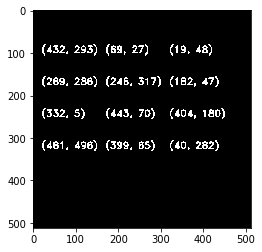

In [6]:
img_r = make_image(coords_r)

plt.imshow(img_r, cmap='gray');

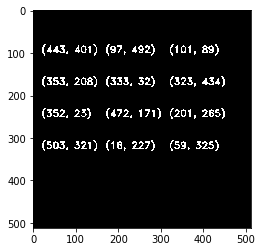

In [7]:
img_g = make_image(coords_g)

plt.imshow(img_g, cmap='gray');

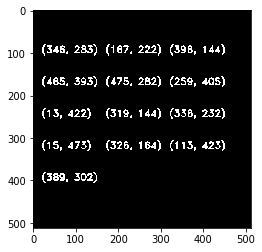

In [8]:
img_b = make_image(coords_b)

plt.imshow(img_b, cmap='gray');

## Save

In [9]:
os.makedirs('data', exist_ok=True)
np.save('data/hidden_r', img_r // 255)
np.save('data/hidden_g', img_g // 255)
np.save('data/hidden_b', img_b // 255)
np.save('data/coords', coords)